1. convert the date format
2. find out the missing value and delete or fill it
3. catagorical data, create the lable

In [350]:
# importing pandas and numpy package
import pandas as pd
import numpy as np

# imported the CSV file
dt = pd.read_csv(r"C:\Users\MissWu\Desktop\Master thesis\BMP1.csv")
dt.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CustomerID,Postno,State,YearOfBirth,Gender,InvociesQuantity,LastPurchaseDate,TotalConsumption,SubscriptionStartDate,SubscriptionEndDate,ReceviedTotal,Product,ActiveStatus,SourceCode,OrderSource,PromotionChannel
0,1000022,5463,USKEDALEN,1950.0,2,12,20211026,8352,20171108,20671228,14,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside
1,1000342,6885,ÅRDALSTANGEN,1969.0,1,12,20210803,8352,20171206,20671228,13,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside
2,1000223,1880,EIDSBERG,1942.0,1,12,20210817,8352,20170119,20671228,16,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside
3,1000440,9420,LUNDENES,1949.0,2,13,20211028,6997,20170321,20180913,6,4mnd Collagen+ abo,0,1,Web,NO Hjemmeside
4,1000768,5122,MORVIK,1945.0,2,7,20210216,4455,20171009,20190506,6,4mnd Collagen+ abo,0,1,Web,NO Hjemmeside


In [351]:
# checking the number of rows and columns
dt.shape

(217727, 16)

In [352]:
from datetime import datetime

# converted the date field from string to DateTime to make it workable
dt['LastPurchaseDate'] = pd.to_datetime(
                          dt['LastPurchaseDate'],
                          format='%Y%m%d'
)
dt['SubscriptionStartDate'] = pd.to_datetime(
                          dt['SubscriptionStartDate'],
                          format='%Y%m%d'

)
dt['SubscriptionEndDate'] = pd.to_datetime(
                          dt['SubscriptionEndDate'],
                          format='%Y%m%d'
)

dt['YearOfBirth'] = pd.to_datetime(
                          dt['YearOfBirth'],
                          format='%Y',errors = 'coerce'
)  

dt.head()


,CustomerID,Postno,State,YearOfBirth,Gender,InvociesQuantity,LastPurchaseDate,TotalConsumption,SubscriptionStartDate,SubscriptionEndDate,ReceviedTotal,Product,ActiveStatus,SourceCode,OrderSource,PromotionChannel
0,1000022,5463,USKEDALEN,1950-01-01,2,12,2021-10-26,8352,2017-11-08,2067-12-28,14,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside
1,1000342,6885,ÅRDALSTANGEN,1969-01-01,1,12,2021-08-03,8352,2017-12-06,2067-12-28,13,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside
2,1000223,1880,EIDSBERG,1942-01-01,1,12,2021-08-17,8352,2017-01-19,2067-12-28,16,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside
3,1000440,9420,LUNDENES,1949-01-01,2,13,2021-10-28,6997,2017-03-21,2018-09-13,6,4mnd Collagen+ abo,0,1,Web,NO Hjemmeside
4,1000768,5122,MORVIK,1945-01-01,2,7,2021-02-16,4455,2017-10-09,2019-05-06,6,4mnd Collagen+ abo,0,1,Web,NO Hjemmeside


In [353]:
# 检查subscription的最早日期和最晚日期

min_date = dt['SubscriptionStartDate'].min()
min_date

Timestamp('2013-03-18 00:00:00')

In [354]:
max_date = dt["SubscriptionStartDate"].max()
max_date

Timestamp('2021-11-09 00:00:00')

In [355]:
# Checking the information of dataset and the number of missing values in each column
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217727 entries, 0 to 217726
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CustomerID             217727 non-null  int64         
 1   Postno                 217727 non-null  object        
 2   State                  217727 non-null  object        
 3   YearOfBirth            204331 non-null  datetime64[ns]
 4   Gender                 217727 non-null  int64         
 5   InvociesQuantity       217727 non-null  int64         
 6   LastPurchaseDate       217727 non-null  datetime64[ns]
 7   TotalConsumption       217727 non-null  int64         
 8   SubscriptionStartDate  217727 non-null  datetime64[ns]
 9   SubscriptionEndDate    217727 non-null  datetime64[ns]
 10  ReceviedTotal          217727 non-null  int64         
 11  Product                217727 non-null  object        
 12  ActiveStatus           217727 non-null  int6

In [360]:
# Check for outliers:
dt.skew()

CustomerID          0.067061
Gender             -0.457918
InvociesQuantity    1.095691
TotalConsumption    1.180990
ReceviedTotal       1.929286
ActiveStatus        1.436744
SourceCode          0.869562
dtype: float64

In [356]:
# drop all NaN values in 'YearOfBirth' column
dt.dropna(subset=['YearOfBirth'], inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204331 entries, 0 to 217726
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   CustomerID             204331 non-null  int64         
 1   Postno                 204331 non-null  object        
 2   State                  204331 non-null  object        
 3   YearOfBirth            204331 non-null  datetime64[ns]
 4   Gender                 204331 non-null  int64         
 5   InvociesQuantity       204331 non-null  int64         
 6   LastPurchaseDate       204331 non-null  datetime64[ns]
 7   TotalConsumption       204331 non-null  int64         
 8   SubscriptionStartDate  204331 non-null  datetime64[ns]
 9   SubscriptionEndDate    204331 non-null  datetime64[ns]
 10  ReceviedTotal          204331 non-null  int64         
 11  Product                204331 non-null  object        
 12  ActiveStatus           204331 non-null  int6

In [357]:
# sorting by "Customer ID"
#dt.sort_values("CustomerID", inplace = True)

# Import label encoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# label_encoder object knows how to understand word labels.
le = preprocessing.LabelEncoder()
 
# Encode labels in column 'Customer ID'.
dt['CustomerID']= le.fit_transform(dt['CustomerID'])
 
dt['CustomerID'].unique()

# apply get dummies for selected columns

df_data = pd.get_dummies(dt,columns=["OrderSource"]) # can check "State","Product" as well
df_data.head()

,CustomerID,Postno,State,YearOfBirth,Gender,InvociesQuantity,LastPurchaseDate,TotalConsumption,SubscriptionStartDate,SubscriptionEndDate,...,OrderSource_Mail,OrderSource_Post/brev,OrderSource_Retur,OrderSource_SMS,OrderSource_Stand,OrderSource_Svarkort A,OrderSource_Svarkort U,OrderSource_TM,OrderSource_Telefon,OrderSource_Web
0,1980,5463,USKEDALEN,1950-01-01,2,12,2021-10-26,8352,2017-11-08,2067-12-28,...,0,0,0,0,0,0,0,0,0,1
1,1982,6885,ÅRDALSTANGEN,1969-01-01,1,12,2021-08-03,8352,2017-12-06,2067-12-28,...,0,0,0,0,0,0,0,0,0,1
2,1981,1880,EIDSBERG,1942-01-01,1,12,2021-08-17,8352,2017-01-19,2067-12-28,...,0,0,0,0,0,0,0,0,0,1
3,1984,9420,LUNDENES,1949-01-01,2,13,2021-10-28,6997,2017-03-21,2018-09-13,...,0,0,0,0,0,0,0,0,0,1
4,1988,5122,MORVIK,1945-01-01,2,7,2021-02-16,4455,2017-10-09,2019-05-06,...,0,0,0,0,0,0,0,0,0,1


In [358]:
# Checking the entire statistical description of dataset
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,204331.0,74172.470335,43842.452436,0.0,36184.5,73304.0,111088.0,154595.0
Gender,204331.0,1.550895,0.520896,0.0,1.0,2.0,2.0,2.0
InvociesQuantity,204331.0,5.767314,3.917262,0.0,3.0,5.0,8.0,58.0
TotalConsumption,204331.0,3036.447235,2680.937740,0.0,875.0,2167.0,4634.0,34800.0
ReceviedTotal,204331.0,4.536164,4.515027,0.0,2.0,3.0,6.0,57.0
ActiveStatus,204331.0,0.208285,0.406082,0.0,0.0,0.0,0.0,1.0
SourceCode,204331.0,3.706589,3.149863,0.0,1.0,2.0,6.0,14.0


In [325]:
# checking the statistical description of specific attribute
dt["OrderSource"].describe()

count     204331
unique        15
top          Web
freq       87814
Name: OrderSource, dtype: object

In [339]:
#df = dt[["CustomerID", "SubscriptionStartDate", "TotalConsumption"]]

#from lifetimes.utils import *
from lifetimes.utils import summary_data_from_transaction_data
data =  summary_data_from_transaction_data(dt, "CustomerID", "SubscriptionStartDate",
                                           monetary_value_col="TotalConsumption",
                                           observation_period_end="2021-11-09")

data.sort_values("monetary_value").head()
#A frequency of 0 means there is only one purchase

,frequency,recency,T,monetary_value
CustomerID,,,,
0,0.0,0.0,85.0,0.0
99913,0.0,0.0,1156.0,0.0
99912,0.0,0.0,1156.0,0.0
99911,0.0,0.0,1156.0,0.0
99910,0.0,0.0,1156.0,0.0


<AxesSubplot:ylabel='Frequency'>

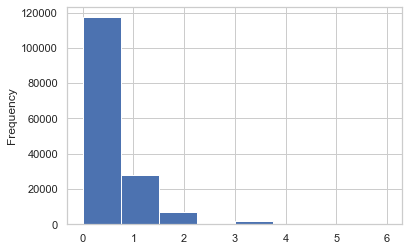

In [340]:
import matplotlib.pyplot as plt
%matplotlib inline
from lifetimes.plotting import *
data["frequency"].plot(kind="hist",bins=8)
#It can be seen that there are mostly 0, and the distribution is skewed to the left

<AxesSubplot:>

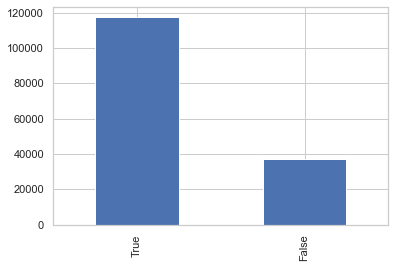

In [341]:
(data.frequency == 0).value_counts().plot.bar()
#Percentage of consumption once in the period

In [342]:
sum(data["frequency"] ==0)/float(len(data))
#The result is: 0.7592111050738699
#The frequency is 0, accounting for 75.9% of the total

0.7592111050738699

In [343]:
# extract the month and year from the “SubscriptionStartDate” feature
dt["MonthByYear"] = dt["SubscriptionStartDate"].apply(lambda x: x.strftime("%b-%Y"))
dt.head()

,CustomerID,Postno,State,YearOfBirth,Gender,InvociesQuantity,LastPurchaseDate,TotalConsumption,SubscriptionStartDate,SubscriptionEndDate,ReceviedTotal,Product,ActiveStatus,SourceCode,OrderSource,PromotionChannel,MonthByYear
0,1980,5463,USKEDALEN,1950-01-01,2,12,2021-10-26,8352,2017-11-08,2067-12-28,14,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside,Nov-2017
1,1982,6885,ÅRDALSTANGEN,1969-01-01,1,12,2021-08-03,8352,2017-12-06,2067-12-28,13,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside,Dec-2017
2,1981,1880,EIDSBERG,1942-01-01,1,12,2021-08-17,8352,2017-01-19,2067-12-28,16,4mnd Collagen+ abo,1,1,Web,NO Hjemmeside,Jan-2017
3,1984,9420,LUNDENES,1949-01-01,2,13,2021-10-28,6997,2017-03-21,2018-09-13,6,4mnd Collagen+ abo,0,1,Web,NO Hjemmeside,Mar-2017
4,1988,5122,MORVIK,1945-01-01,2,7,2021-02-16,4455,2017-10-09,2019-05-06,6,4mnd Collagen+ abo,0,1,Web,NO Hjemmeside,Oct-2017


In [344]:
# create a pivot table that takes the columns as input
## and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.
Sales=dt.pivot_table(index=["CustomerID"],columns=["MonthByYear"],values="TotalConsumption",aggfunc="sum",fill_value=0).reset_index()
Sales.tail()

MonthByYear,CustomerID,Apr-2015,Apr-2016,Apr-2017,Apr-2018,Apr-2019,Apr-2020,Apr-2021,Aug-2014,Aug-2015,...,Oct-2020,Oct-2021,Sep-2014,Sep-2015,Sep-2016,Sep-2017,Sep-2018,Sep-2019,Sep-2020,Sep-2021
154591,154591,0,0,0,775,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154592,154592,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154593,154593,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154594,154594,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
154595,154595,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [345]:
# sum all the months sales.
Sales["CLV"]=Sales.iloc[:,2:].sum(axis=1)
Sales.head()

MonthByYear,CustomerID,Apr-2015,Apr-2016,Apr-2017,Apr-2018,Apr-2019,Apr-2020,Apr-2021,Aug-2014,Aug-2015,...,Oct-2021,Sep-2014,Sep-2015,Sep-2016,Sep-2017,Sep-2018,Sep-2019,Sep-2020,Sep-2021,CLV
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,854
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3559
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1571
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11060
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16008


<AxesSubplot:xlabel='CLV', ylabel='Density'>

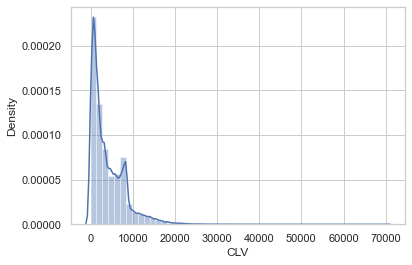

In [346]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.distplot(Sales["CLV"],kde=True)

In [347]:
Sales["CLV"].describe()

count    154596.000000
mean       4005.371459
std        4071.400648
min           0.000000
25%         875.000000
50%        2562.000000
75%        6284.500000
max       69956.000000
Name: CLV, dtype: float64

We can try to do:
1. What will the customers spend in the next 30/60/90-days?(regression)
2.what is the probability of a customer to make a purchase in next 30/60/90-days?(classification)

# Step 1

In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

NameError: name 'X' is not defined